In [43]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


Problem 1: EU Cities Temperatures Dataset (55 points)
Given a CSV data file as represented by the sample file EuCitiesTemperatures.csv (213 records), load it into a Pandas DataFrame and perform the following tasks on it.

1. Preprocessing/Analysis (28 pts)
[9 pts] Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places.

In [44]:
eucities = pd.read_csv(open("EuCitiesTemperatures.csv"))
eucountries = eucities.groupby('country')
avgs = (eucities.groupby('country').sum() / eucities.groupby('country').count()).round(2)
avgs = avgs[['latitude', 'longitude']]
eucities = eucities.set_index('country').fillna(avgs).reset_index()

2. [9 pts] Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). Find out which countries have the maximum number of cities in this geographical band. (More than one country could have the maximum number of values.)


In [45]:
city_subset = eucities[(eucities['latitude'] >= 40) & (eucities['latitude'] <= 60) & (eucities['longitude'] >= 15) & (
        eucities['longitude'] <= 30)]
countries_in_band = city_subset.groupby('country').count()
print(countries_in_band[countries_in_band['city'] == countries_in_band['city'].max()].reset_index()['country'])

0     Poland
1    Romania
Name: country, dtype: object


3. [10 pts] Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no).

In [46]:
eu_coast = eucities[(eucities['EU'] == 'yes') & (eucities['coastline'] == 'yes')]
eu_coast_avg = eu_coast['temperature'].mean()
eu_notcoast = eucities[(eucities['EU'] == 'yes') & (eucities['coastline'] == 'no')]
eu_notcoast_avg = eu_notcoast['temperature'].mean()
noteu_coast = eucities[(eucities['EU'] == 'no') & (eucities['coastline'] == 'yes')]
noteu_coast_avg = noteu_coast['temperature'].mean()
noteu_notcoast = eucities[(eucities['EU'] == 'no') & (eucities['coastline'] == 'no')]
noteu_notcoast_avg = noteu_notcoast['temperature'].mean()

eucities.loc[(eucities['EU'] == 'yes') & (eucities['coastline'] == 'yes') & (
    pd.isna(eucities['temperature'])), 'temperature'] = eu_coast_avg
eucities.loc[(eucities['EU'] == 'no') & (eucities['coastline'] == 'yes') & (
    pd.isna(eucities['temperature'])), 'temperature'] = noteu_coast_avg
eucities.loc[(eucities['EU'] == 'yes') & (eucities['coastline'] == 'no') & (
    pd.isna(eucities['temperature'])), 'temperature'] = eu_notcoast_avg
eucities.loc[(eucities['EU'] == 'no') & (eucities['coastline'] == 'no') & (
    pd.isna(eucities['temperature'])), 'temperature'] = noteu_notcoast_avg
eucities

,country,city,population,EU,coastline,latitude,longitude,temperature
0,Albania,Elbasan,2.90,no,yes,41.12,20.08,15.180000
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.481538
2,Austria,Innsbruck,8.57,yes,no,47.85,11.41,4.540000
3,Austria,Graz,8.57,yes,no,47.08,14.02,6.910000
4,Austria,Linz,8.57,yes,no,48.32,14.29,6.790000
5,Austria,Salzburg,8.57,yes,no,47.81,14.02,4.620000
6,Austria,Vienna,8.57,yes,no,48.20,16.37,7.860000
7,Belarus,Minsk,9.48,no,no,52.61,27.57,5.280000
8,Belarus,Orsha,9.48,no,no,52.61,25.64,4.930000
9,Belarus,Pinsk,9.48,no,no,52.61,25.64,6.420000


Visualization (27 pts)
1. For all plots, make sure to label the axes, and set appropriate tick labels.

[6 pts] Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above.


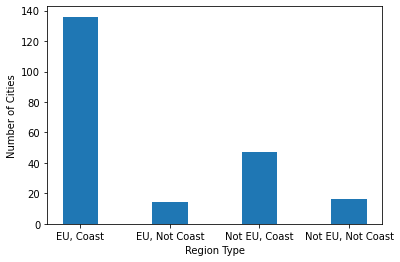

In [47]:
from matplotlib import pyplot as plt

names = ['EU, Coast', 'EU, Not Coast', 'Not EU, Coast', 'Not EU, Not Coast']
values = [len(eu_coast), len(eu_notcoast), len(noteu_coast), len(noteu_notcoast)]
plt.xlabel('Region Type')
plt.ylabel('Number of Cities')
plt.bar(names, values, width=.4)
plt.show()

2. [7 pts] Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color.


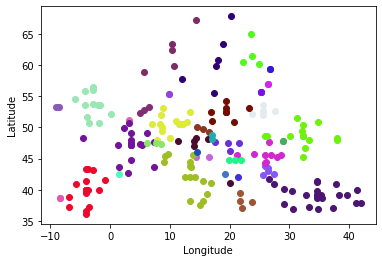

In [48]:
for key, group in eucities.groupby('country'):
    plt.scatter(group['longitude'], group['latitude'], color=np.random.rand(3, ))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

3. [6 pts] The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).


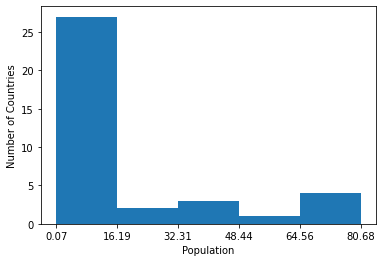

In [49]:
countries = eucities['population'].drop_duplicates()
n, bins, patches = plt.hist(countries, bins=5)
plt.xticks(bins)
plt.xlabel('Population')
plt.ylabel('Number of Countries')
plt.show()


4. [8 pts] Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.
Each subplot should be a scatter plot of Latitude (y-axis) vs. City (x-axis), where the color of the plot points should be based on the temperature values: ‘red’ for temperatures above 10, ‘blue’ for temperatures below 6 and ‘orange for temperatures between 6 and 10 (both inclusive). For each subplot, set xticks to an array of numbers from 0 to n-1 (both inclusive), where n is the total number of cities in each region type. This represents each city as a number between 0 and n-1.

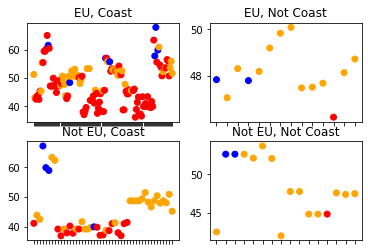

In [50]:
pd.options.mode.chained_assignment = None
eu_coast = eucities[(eucities['EU'] == 'yes') & (eucities['coastline'] == 'yes')]
eu_notcoast = eucities[(eucities['EU'] == 'yes') & (eucities['coastline'] == 'no')]
noteu_coast = eucities[(eucities['EU'] == 'no') & (eucities['coastline'] == 'yes')]
noteu_notcoast = eucities[(eucities['EU'] == 'no') & (eucities['coastline'] == 'no')]
regions = [eu_coast, eu_notcoast, noteu_coast, noteu_notcoast]
for r in regions:
    r.loc[:, 'color'] = [0 for _ in range(len(r))]
    r.loc[r['temperature'] > 10, 'color'] = 'red'
    r.loc[(r['temperature'] >= 6) & (r['temperature'] <= 10), 'color'] = 'orange'
    r.loc[r['temperature'] < 6, 'color'] = 'blue'

fig, axes = plt.subplots(2, 2)
axes[0][0].scatter(eu_coast['city'], eu_coast['latitude'], color=eu_coast['color'])
axes[0][0].set_xticks(np.arange(0, len(eu_coast)))
axes[0][0].set_xticklabels([])
axes[0][0].set_title('EU, Coast')

axes[0][1].scatter(eu_notcoast['city'], eu_notcoast['latitude'], color=eu_notcoast['color'])
axes[0][1].set_xticks(np.arange(0, len(eu_notcoast)))
axes[0][1].set_xticklabels([])
axes[0][1].set_title('EU, Not Coast')

axes[1][0].scatter(noteu_coast['city'], noteu_coast['latitude'], color=noteu_coast['color'])
axes[1][0].set_xticks(np.arange(0, len(noteu_coast)))
axes[1][0].set_xticklabels([])
axes[1][0].set_title('Not EU, Coast')

axes[1][1].scatter(noteu_notcoast['city'], noteu_notcoast['latitude'], color=noteu_notcoast['color'])
axes[1][1].set_xticks(np.arange(0, len(noteu_notcoast)))
axes[1][1].set_xticklabels([])
axes[1][1].set_title('Not EU, Not Coast')

plt.show()